# InceptionV3_Retrain

### References:
1. https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

In [1]:
import os
import time

import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import sys
def describe(arr):
    print(arr.shape, arr.min(), arr.max(), sys.getsizeof(arr))

In [3]:
from skimage import transform,data

def resize_image(arr, size=200):
    new_arr = np.zeros((arr.shape[0], size, size))
    for i, img in enumerate(arr):
        new_arr[i] = transform.resize(img, (size, size), mode='reflect')
    return new_arr
# test
aa = np.random.random((10, 75, 75))*255
describe(aa)
bb = resize_image(aa, 150)
describe(bb)

(10, 75, 75) 0.000767446067171 254.98700199 450128
(10, 150, 150) 2.4966858672 247.653036247 1800128


In [4]:
train_file = ".\\input\\train.csv"
test_file = ".\\input\\test.csv"
# output_file = ".\\output\\submission.csv"

In [5]:
%%time
raw_data = np.loadtxt(train_file, skiprows=1, dtype='float32', delimiter=',')
x_data_dim1 = raw_data[:,1:]
y_data = raw_data[:,0]
x_test_dim1 = np.loadtxt(test_file, skiprows=1, dtype='float32', delimiter=',')

describe(x_data_dim1)
describe(y_data)
describe(x_test_dim1)

(42000, 784) 0.0 255.0 112
(42000,) 0.0 9.0 96
(28000, 784) 0.0 255.0 112
Wall time: 38 s


1.0


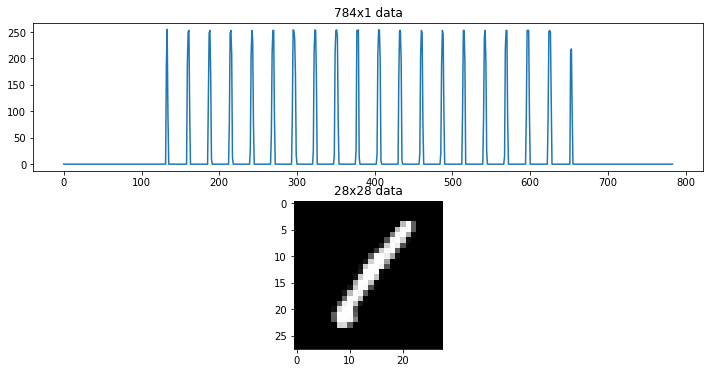

In [6]:
index = 0
print(y_data[0])
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_data_dim1[index].reshape(28*28, 1))
ax[0].set_title('784x1 data')
ax[1].imshow(x_data_dim1[index].reshape(28, 28), cmap='gray')
ax[1].set_title('28x28 data')

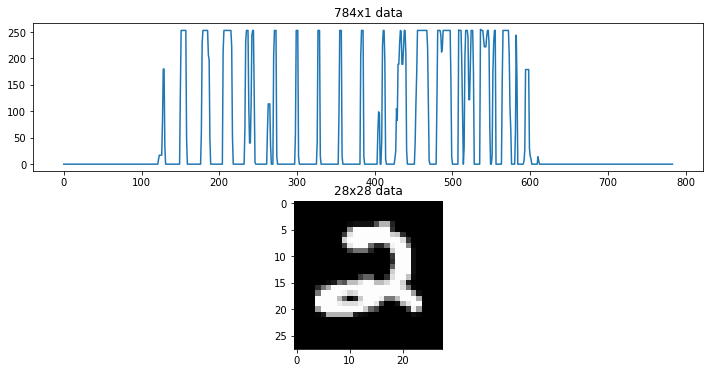

In [7]:
index = 0
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_test_dim1[index].reshape(28*28, 1))
ax[0].set_title('784x1 data')
ax[1].imshow(x_test_dim1[index].reshape(28, 28), cmap='gray')
ax[1].set_title('28x28 data')

In [8]:
%%time
target_size = 150
x_data = x_data_dim1.reshape(-1, 28, 28)/255.
x_test = x_test_dim1.reshape(-1, 28, 28)/255.
describe(x_data)
describe(x_test)

x_data = resize_image(x_data, target_size)
x_test = resize_image(x_test, target_size)
describe(x_data)
describe(x_test)

# x_data = x_data.reshape(-1, target_size, target_size, 1)
# x_test = x_test.reshape(-1, target_size, target_size, 1)
# describe(x_data)
# describe(x_test)

del x_data_dim1
del x_test_dim1

(42000, 28, 28) 0.0 1.0 131712128
(28000, 28, 28) 0.0 1.0 87808128
(42000, 150, 150) 0.0 1.0 7560000128
(28000, 150, 150) 0.0 1.0 5040000128
Wall time: 1min 37s


1.0


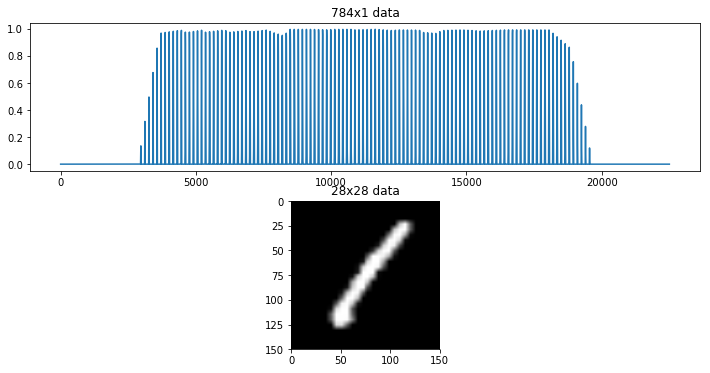

In [9]:
index = 0
print(y_data[0])
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_data[index].reshape(target_size*target_size, 1))
ax[0].set_title('784x1 data')
ax[1].imshow(x_data[index].reshape(target_size, target_size), cmap='gray')
ax[1].set_title('28x28 data')

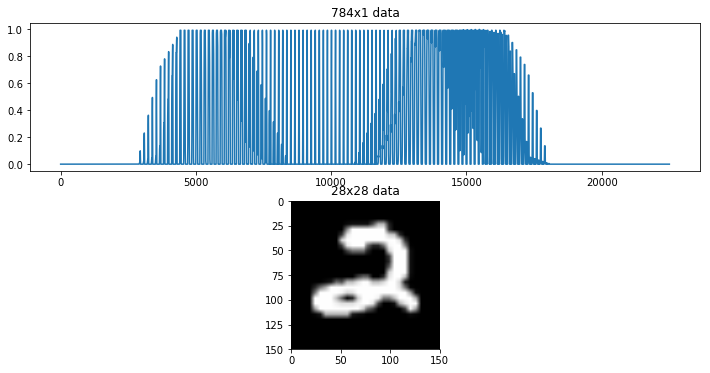

In [10]:
index = 0
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_test[index].reshape(target_size*target_size, 1))
ax[0].set_title('784x1 data')
ax[1].imshow(x_test[index].reshape(target_size, target_size), cmap='gray')
ax[1].set_title('28x28 data')

In [11]:
# x_data = x_data.astype("float32")/255.
# x_test = x_test.astype("float32")/255.

In [12]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
print(y_data[0])
y_data = to_categorical(y_data)
print(y_data[0])

Using TensorFlow backend.


1.0
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


In [13]:
%%time
x_data1 = np.concatenate([x_data.copy()[:, :, :, np.newaxis],
                         x_data.copy()[:, :, :, np.newaxis],
                         x_data.copy()[:, :, :, np.newaxis]], axis=-1)
describe(x_data1)

gc.collect()
x_test1 = np.concatenate([x_test.copy()[:, :, :, np.newaxis],
                         x_test.copy()[:, :, :, np.newaxis],
                         x_test.copy()[:, :, :, np.newaxis]], axis=-1)

del x_data
del x_test
describe(x_data1)
describe(y_data)
describe(x_test1)

MemoryError: 

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.05)
describe(x_train)
describe(x_val)
describe(y_train)
describe(y_val)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.models import Model

from keras.applications.inception_v3 import InceptionV3

In [ ]:
def build_model(input_shape):
    base_model = InceptionV3(weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    return model

In [ ]:
model = build_model(x_train.shape[1:])
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    rotation_range = 20,
    height_shift_range = 0.2,
    width_shift_range = 0.2
)

val_datagen = ImageDataGenerator()

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-4 * 0.995 ** x)

# def get_lr(x):
#     lr = round(1e-4 * 0.995 ** x, 6)
#     if lr < 5e-5:
#         lr = 5e-5
#     print(lr, end='  ')
#     return lr
# annealer = LearningRateScheduler(get_lr)

callbacks = [annealer]

In [ ]:
%%time
batch_size = 128
steps_per_epoch = x_train.shape[0] / batch_size
hist = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size, seed=2018),
    steps_per_epoch=steps_per_epoch,
    epochs=50, #Increase this when not on Kaggle kernel
    verbose=1,  #1 for ETA, 0 for silent
    callbacks=callbacks,
    max_queue_size=256,
    workers=32,
    validation_steps=1000,
    validation_data=val_datagen.flow(x_val, y_val, batch_size=32, seed=2018)
)

In [ ]:
# %%time
# hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64, seed=2018),
#                            steps_per_epoch=100,
#                            epochs=50, #Increase this when not on Kaggle kernel
#                            verbose=1,  #1 for ETA, 0 for silent
#                            validation_data=(x_val[:400,:], y_val[:400,:]), 
#                            callbacks=[annealer])

In [ ]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

In [ ]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
def show_diffs(model, x_data, y_data, labels):
    y_hat = model.predict(x_data)
    y_pred = np.argmax(y_hat, axis=1)
    y_true = np.argmax(y_data, axis=1)
    print('accuracy_score: %s' % accuracy_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, labels)
    print(cm)
    indexes = []
    diffs = []
    for i, p in enumerate(zip(y_true, y_pred)):
        if p[0] != p[1]:
            indexes.append(i)
            diffs.append(p)
    count = len(indexes)
    print('count: %s' % count)
    figs, axes = plt.subplots(count, 1, figsize=(count,180))
    print(axes.shape)
    for i, p in enumerate(diffs):
        axes[i].imshow(x_val[indexes[i]].reshape(28, 28), cmap='gray')
        axes[i].set_title('%s -> %s' % (p[0], p[1]))
        
show_diffs(model, x_val, y_val, labels=list(range(0, 10)))

## Predict

In [ ]:
import time
import os

project_name = 'Digit_Recognizer'
step_name = 'InceptionV3_Retrain'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
final_acc_str = str(int(final_acc*10000))
run_name = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name)
cwd = os.getcwd()
output_file = os.path.join(cwd, 'output', run_name + '.csv')
print(output_file)

In [ ]:
y_hat = model.predict(x_test, batch_size=64)

In [ ]:
y_pred = np.argmax(y_hat,axis=1)

In [ ]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [ ]:
print('Done!')